# **ML LAB EXPERIMENT - 2**

DHANESH VC
24BAD018

# **SCENARIO 1:**

Predict ocean water temperature using environmental and depth-related features.

Dataset (Kaggle – Public): https://www.kaggle.com/datasets/sohier/calcofi


Target Variable:

· Water Temperature (T_degC)

Sample Input Features
· Depth (m)
· Salinity
· Oxygen
· Latitude
· Longitude




# **IN-LAB TASKS**

• Import necessary Python libraries (NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn).

• Load the CalCOFI dataset into a Pandas DataFrame

• Select relevant numerical features and target variable.

• Handle missing values using mean/median imputation.

• Perform feature scaling using StandardScaler.

• Split the dataset into training and testing sets.

• Train a Linear Regression model using Scikit-learn.

• Predict water temperature for test data.

• Evaluate model performance using: – Mean Squared Error (MSE) – Root Mean Squared Error (RMSE) – R² Score

• Visualize: – Actual vs Predicted temperature – Residual errors

• Optimize model performance using: – Feature selection – Regularization (Ridge / Lasso)

In [ ]:
#DHANESH VC 24BAD018
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
bottle=pd.read_csv("bottle.csv")
cast=pd.read_csv("cast.csv")
df=pd.merge(bottle,cast,on=["Cst_Cnt", "Sta_ID"],how='inner')

/tmp/ipython-input-1729320136.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle=pd.read_csv("bottle.csv")
/tmp/ipython-input-1729320136.py:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast=pd.read_csv("cast.csv")


In [ ]:
target = "T_degC"
features = [
    "Depthm",
    "Salnty",
    "O2ml_L",
    "Lat_Dec",
    "Lon_Dec"
]
data=df[features+[target]]


In [ ]:
imputer=SimpleImputer(strategy="median")
data_imputed=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)
x = data_imputed[features]
y = data_imputed[target]


In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)



MSE : 5.096955567296102
RMSE: 2.257643808774117
R²  : 0.7127886955547011


DHANESH VC 24BAD018


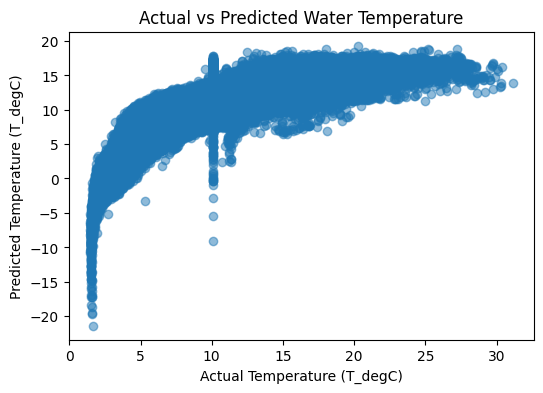

In [ ]:
print("DHANESH VC 24BAD018")
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature (T_degC)")
plt.ylabel("Predicted Temperature (T_degC)")
plt.title("Actual vs Predicted Water Temperature")
plt.show()


DHANESH VC 24BAD018


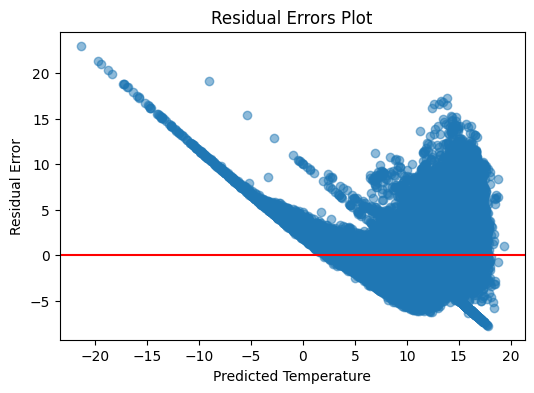

In [ ]:
print("DHANESH VC 24BAD018")
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red")
plt.xlabel("Predicted Temperature")
plt.ylabel("Residual Error")
plt.title("Residual Errors Plot")
plt.show()


In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, ridge_pred))


Ridge R²: 0.7127886951278417


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, lasso_pred))


Lasso R²: 0.7127462154813159


# **SCENARIO 2:** Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.

Dataset (Kaggle – Public): https://www.kaggle.com/datasets/debashis74017/lic-stock-price-data

Target Variable (Derived): • Price Movement – 1 → Closing price > Opening price – 0 → Closing price ≤ Opening price

Input Features: • Open • High • Low • Volume


# **IN-LAB TASKS (Logistic Regression)**

• Import required Python libraries.

• Load LIC stock dataset into Pandas.

• Create a binary target variable (Price Movement).

• Handle missing values.

• Perform feature scaling.

• Split the dataset into training and testing sets.

• Train a Logistic Regression model.

• Predict stock movement for test data.

• Evaluate classification performance using: – Accuracy – Precision – Recall – F1-Score – Confusion Matrix

• Visualize: – ROC Curve – Feature importance

• Optimize model using: – Hyperparameter tuning (C, penalty) – Regularization



In [ ]:

import pandas as pd
df = pd.read_csv("LICI - Daily data.csv")
df["Price_Movement"] = (df["Close"] > df["Open"]).astype(int)


In [ ]:
features = ["Open", "High", "Low"]
X = df[features]
y = df["Price_Movement"]


In [ ]:
#REPLACING NULL VALUE
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [ ]:
#SPLITING THE DATA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#SCALING THE FEATURES TO STOP FROM DOMINATION
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
#CLASSIFICATION MODEL USING LINEAR REEGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

[[14  0]
 [ 6  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[14  0]
 [ 6  0]]


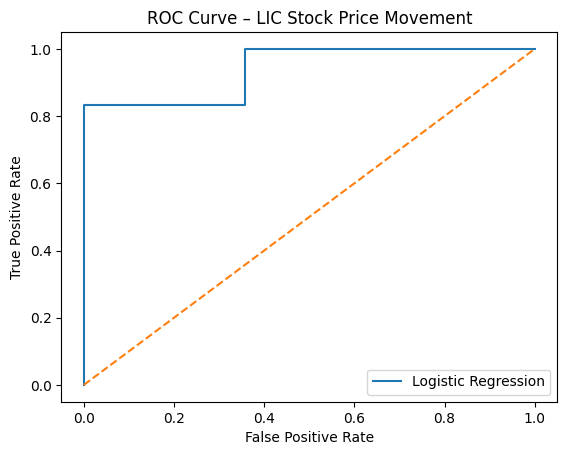

AUC Score: 0.9404761904761905


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# probability of class 1 (Price goes UP)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – LIC Stock Price Movement")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

import pandas as pd
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importance)


High    0.349909
Open    0.326273
Low     0.323818
dtype: float64


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring="f1",
    cv=5
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.3976190476190476
